### Question 2

In [80]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


dat = make_blobs(n_samples=1000, n_features=16, random_state=1)

In [125]:
#Covariance Matrix
sc = StandardScaler()
std_dat = sc.fit_transform(dat[0])
cov_mat = np.cov(std_dat.T, bias=0)

#Eigenvalues, Eigenvectors
e_val, e_vec = np.linalg.eig(cov_mat)

#Variance of Projected Data
#Inspiration from https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained to calculate total variance
w1 = e_vec[:, :1]
pc1 = np.dot(np.array(std_dat),w1)
tot_var = np.trace(cov_mat)
pc1_var = np.var(pc1)
explained = pc1_var / tot_var
explained

0.5531515741739182

In [126]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(std_dat)
pca.explained_variance_ratio_[0]

0.5537052794533714

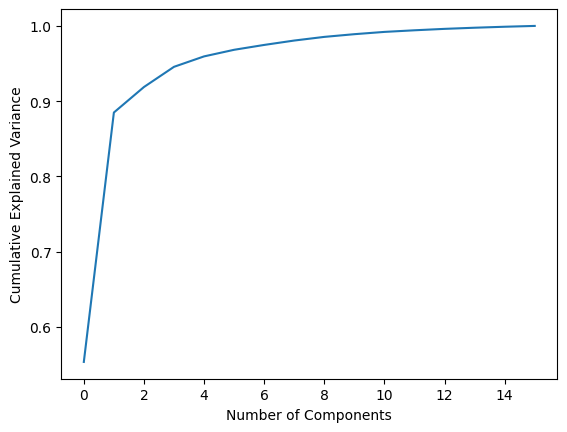

In [129]:
from matplotlib.ticker import MaxNLocator
ax = plt.figure().gca()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

As seen from plot above, the best number of components is 2, namely PC0 and PC1. This is because the cumulative explained variance does not increase substantially after PC1